<a href="https://colab.research.google.com/github/zd2011/responsible_ds/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDS Homework 3 Template
## Spring 2023


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.5 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Problem 3

### Part (A)

In [ ]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [ ]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [ ]:
# Train & fit the classifier 
model = SGDClassifier(loss='log_loss', random_state = 123)
model.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=123)

### Part (B)

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[275  44]
 [  4 394]]


In [ ]:
#[[Correct Atheist, Incorrect Christian],
#[Incorrect Atheist, Correct Christian]]

#### Explainer

In [ ]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
X_test_array = X_test.toarray() # We need to provide the data in dense format, not sparse

In [ ]:
# Select 5 documents in the test set for explanation
np.random.seed(1) 
#get incorrect and correct classified index
c_ind = np.where(y_pred == y_test)[0]
inc_ind = np.where(y_pred != y_test)[0]
#randomly pick 5
c_doc = np.random.choice(c_ind, 2, replace=False)
inc_doc = np.random.choice(inc_ind, 3, replace=False)
selected_ind = np.concatenate((c_doc, inc_doc))
selected_ind

array([704, 422, 134, 620, 615])

In [ ]:
#graphing them
shap.initjs()
idx = selected_ind[0]
print("#{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

#704, christian Review, :
Prediction: christian, Actual: christian


In [ ]:
shap.initjs()
idx = selected_ind[1]
print("#{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

#422, atheism Review, :
Prediction: atheism, Actual: atheism


In [ ]:
shap.initjs()
idx = selected_ind[2]
print("#{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

#134, atheism Review, :
Prediction: christian, Actual: atheism


In [ ]:
shap.initjs()
idx = selected_ind[3]
print("#{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

#620, atheism Review, :
Prediction: christian, Actual: atheism


In [ ]:
shap.initjs()
idx = selected_ind[4]
print("#{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

#615, atheism Review, :
Prediction: christian, Actual: atheism


### Part (C)


#### Part (i)

In [ ]:
# Compute the accuracy of the classifier and the number of misclassified documents
acc = sklearn.metrics.accuracy_score(model.predict(X_test), y_test)
num_inc = len(inc_ind)
print('accuracy: {}, number of misclassified documents: {}'.format(acc, num_inc))

accuracy: 0.9330543933054394, number of misclassified documents: 48


#### Part (ii)

In [ ]:
# Calculate conf_i for all misclassified documents 
y_prob = model.predict_proba(X_test)

# Calculate probability differences for all misclassified documents
conf_i = np.abs(y_prob[inc_ind][:,0] - y_prob[inc_ind][:,1])
conf_i

array([0.0047108 , 0.36259473, 0.91117649, 0.16578259, 0.71175   ,
       0.09493338, 0.09414382, 0.10441552, 0.39096693, 0.18930005,
       0.54628114, 0.41747669, 0.19997458, 0.26144766, 0.20555808,
       0.47448535, 0.06927158, 0.00526906, 0.08198084, 0.1133275 ,
       0.23666026, 0.5318885 , 0.37997469, 0.31286977, 0.00170906,
       0.35404187, 0.13738512, 0.47266971, 0.17602531, 0.00527963,
       0.34971384, 0.36097595, 0.28743421, 0.16634603, 0.14212872,
       0.90381965, 0.10226606, 0.76273903, 0.76397657, 0.64202643,
       0.13029413, 0.52067823, 0.04724656, 0.27672381, 0.43796792,
       0.35387825, 0.43976518, 0.17388005])

In [ ]:
#chart of conf_i
df_conf_i = pd.DataFrame(conf_i, columns= ['conf_i'])
df_conf_i['incorrect_index'] = inc_ind
df_conf_i

conf_i  incorrect_index
0   0.004711               20
1   0.362595               38
2   0.911176               54
3   0.165783               62
4   0.711750               94
5   0.094933               99
6   0.094144              107
7   0.104416              109
8   0.390967              123
9   0.189300              126
10  0.546281              134
11  0.417477              156
12  0.199975              197
13  0.261448              216
14  0.205558              217
15  0.474485              245
16  0.069272              271
17  0.005269              293
18  0.081981              335
19  0.113327              366
20  0.236660              377
21  0.531889              399
22  0.379975              406
23  0.312870              413
24  0.001709              419
25  0.354042              438
26  0.137385              447
27  0.472670              461
28  0.176025              469
29  0.005280              473
30  0.349714              558
31  0.360976              568
32  0.287434              591
33  0.166346              605
34  0.142129              607
35  0.903820              610
36  0.102266              615
37  0.762739              620
38  0.763977              623
39  0.642026              641
40  0.130294              658
41  0.520678              668
42  0.047247              677
43  0.276724              679
44  0.437968              683
45  0.353878              685
46  0.439765              694
47  0.173880              703

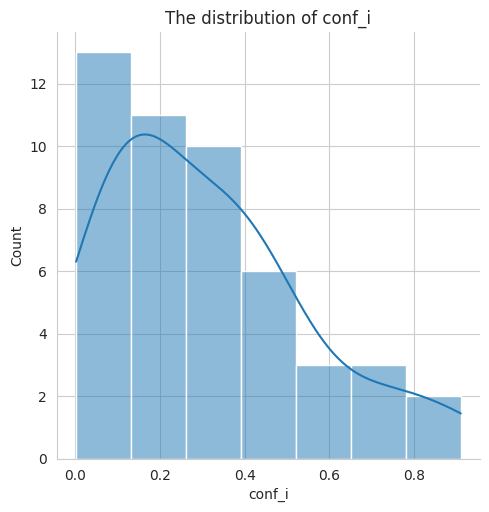

In [ ]:
# Plot conf_i
sns.displot(data = df_conf_i, x = 'conf_i', kde = True)
plt.title('The distribution of conf_i')
plt.show()

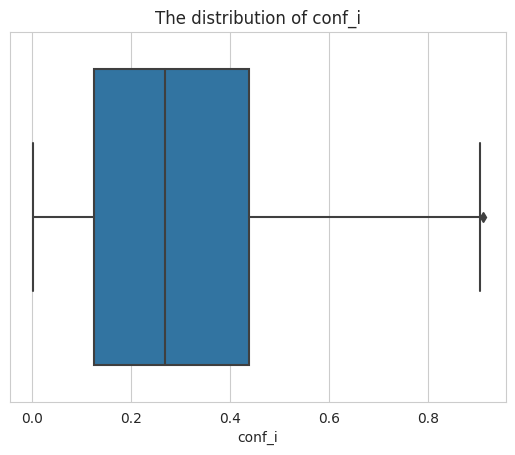

In [ ]:
#boxplot for the distribution
sns.boxplot(data=df_conf_i, x="conf_i")
plt.title('The distribution of conf_i')
plt.show()

#### Part (iii)

In [ ]:
# Identify tokens (word_j) that contributed to the misclassification of documents
#both cases of misclassification
word_j_count_christian = defaultdict(int)
word_j_weight_christian = defaultdict(float)
word_j_count_atheism = defaultdict(int)
word_j_weight_atheism = defaultdict(float)
#collect all cases words count/weight separately
word_j_count = defaultdict(int)
word_j_weight = defaultdict(float)

for idx in inc_ind:
  vals = shap_values[idx,:]
  feats = vectorizer.get_feature_names_out()
#for misclassified atheist documents
  if y_pred[idx] == 1:
    for feat_i, val_i in zip(feats, vals):
      if val_i > 0:
        #add misclassifying words
        word_j_count_christian[feat_i] +=1
        word_j_weight_christian[feat_i] += abs(val_i)

        word_j_count[feat_i] +=1
        word_j_weight[feat_i] += abs(val_i)
#for misclassified christian documents
  else:
    for feat_i, val_i in zip(feats, vals):
      if val_i < 0:
        word_j_count_atheism[feat_i] +=1
        word_j_weight_atheism[feat_i] += abs(val_i)

        word_j_count[feat_i] +=1
        word_j_weight[feat_i] += abs(val_i)

In [ ]:
#creat chart
df_word_j_christian = pd.DataFrame({'count_j': word_j_count_christian, 'weight_j': word_j_weight_christian}).reset_index()
df_word_j_christian.rename(columns={'index':'word_j'}, inplace=True)
df_word_j_christian['original_class'] = 'atheist'
print('words that lead to atheist documents misclassified as christian:')
df_word_j_christian.head()

words that lead to atheist documents misclassified as christian:


word_j  count_j  weight_j original_class
0     000       40  0.025645        atheist
1  001125       44  0.001770        atheist
2    0195       44  0.000593        atheist
3  024150       44  0.012370        atheist
4  062328       44  0.001950        atheist

In [ ]:
df_word_j_atheism = pd.DataFrame({'count_j': word_j_count_atheism, 'weight_j': word_j_weight_atheism}).reset_index()
df_word_j_atheism.rename(columns={'index':'word_j'}, inplace=True)
df_word_j_atheism['original_class'] = 'christian'
print('words that lead to christian documents misclassified as atheism:')
df_word_j_atheism.head()

words that lead to christian documents misclassified as atheism:


word_j  count_j  weight_j original_class
0     00        4  0.011368      christian
1   0001        4  0.000185      christian
2     01        3  0.012962      christian
3     02        4  0.013336      christian
4     03        4  0.012901      christian

In [ ]:
df_word_j_all = pd.DataFrame({'count_j': word_j_count, 'weight_j': word_j_weight}).reset_index()
df_word_j_all.rename(columns={'index':'word_j'}, inplace=True)
df_word_j_all['original_class'] = 'both'
print('words that lead to all misclassification:')
df_word_j_all.head()

words that lead to all misclassification:


word_j  count_j  weight_j original_class
0     000       40  0.025645           both
1  001125       44  0.001770           both
2    0195       44  0.000593           both
3  024150       44  0.012370           both
4  062328       44  0.001950           both

In [ ]:
# Compute the number of documents (count_j) these words helped to misclassify
df_word_j_count = pd.concat([df_word_j_christian[['word_j','count_j','original_class']], 
                             df_word_j_atheism[['word_j','count_j','original_class']],
                             df_word_j_all[['word_j','count_j','original_class']]],
                             ignore_index=True)
df_word_j_count.head()

word_j  count_j original_class
0     000       40        atheist
1  001125       44        atheist
2    0195       44        atheist
3  024150       44        atheist
4  062328       44        atheist

In [ ]:
# Compute the sum of absolute SHAP values (weight_j) for each word_j
df_word_j_weight = pd.concat([df_word_j_christian[['word_j','weight_j','original_class']], 
                             df_word_j_atheism[['word_j','weight_j','original_class']],
                             df_word_j_all[['word_j','weight_j','original_class']]],
                             ignore_index=True)
df_word_j_weight.head()

word_j  weight_j original_class
0     000  0.025645        atheist
1  001125  0.001770        atheist
2    0195  0.000593        atheist
3  024150  0.012370        atheist
4  062328  0.001950        atheist

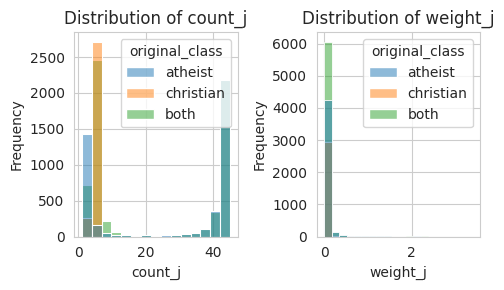

In [ ]:
# Plot the distribution of count_j and weight_j
fig, axes = plt.subplots(1, 2, figsize = (5,3))

sns.histplot(ax=axes[0], data = df_word_j_count, x = 'count_j', hue = 'original_class')
axes[0].set_xlabel("count_j")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of count_j")

sns.histplot(ax=axes[1], data = df_word_j_weight, x = 'weight_j', hue = 'original_class', bins = 20)
axes[1].set_xlabel("weight_j")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of weight_j")

plt.tight_layout()
plt.show()

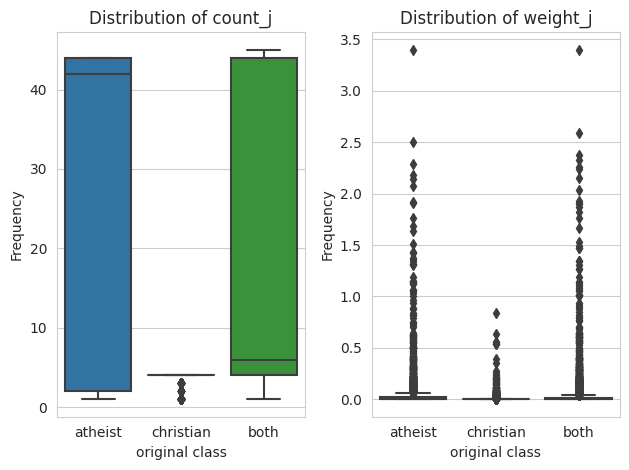

In [ ]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(ax=axes[0], data=df_word_j_count, x="original_class", y="count_j")
axes[0].set_xlabel("original class")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of count_j")

sns.boxplot(ax=axes[1], data=df_word_j_weight, x="original_class", y="weight_j")
axes[1].set_xlabel("original class")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of weight_j")

plt.tight_layout()
plt.show()

### Part (D)

In [ ]:
# Implement a strategy for feature selection
#words in more than 30 misclassified documents are removed
df_to_remove = df_word_j_all[df_word_j_count.count_j>=30]
words_to_remove = df_to_remove['word_j'].values
words_to_remove

Boolean Series key will be reindexed to match DataFrame index.


array(['000', '001125', '0195', ..., '99', 'adherents', 'africa'],
      dtype=object)

In [ ]:
#removing out words as specified above
selected_word = {}
selected_idx = 0
for word, idx in vectorizer.vocabulary_.items():
  if word not in words_to_remove:
    selected_word[word] = selected_idx
    selected_idx +=1

In [ ]:
# Initialize & fit tf-idf vectorizer with selected vocab
selected_vectorizer = TfidfVectorizer(vocabulary=selected_word)

selected_X_train = selected_vectorizer.fit_transform(newsgroups_train.data)
selected_X_test = selected_vectorizer.transform(newsgroups_test.data)

In [ ]:
# Train & fit the classifier 
selected_model = SGDClassifier(loss='log_loss', random_state = 123)
selected_model.fit(selected_X_train, y_train)

SGDClassifier(loss='log_loss', random_state=123)

In [ ]:
#prediction and confusion matrix
selected_y_pred = selected_model.predict(selected_X_test)
selected_cm = confusion_matrix(y_test, selected_y_pred)
print("Confusion Matrix:")
print(selected_cm)

Confusion Matrix:
[[283  36]
 [ 14 384]]


In [ ]:
# Initialize the explainer and apply to test data
selected_explainer = shap.LinearExplainer(selected_model, selected_X_train, 
                                          feature_perturbation="interventional")
selected_shap_values = selected_explainer.shap_values(selected_X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
selected_X_test_array = selected_X_test.toarray() # We need to provide the data in dense format, not sparse

In [ ]:
np.random.seed(1) 
#correcly labeled index with new model
selected_c_ind = np.where(selected_y_pred == y_test)[0]
selected_inc_ind = np.where(selected_y_pred != y_test)[0]

In [ ]:
# Compute the accuracy of the classifier and the number of misclassified documents
selected_acc = sklearn.metrics.accuracy_score(selected_model.predict(selected_X_test), y_test)
selected_num_inc = len(selected_inc_ind)
print('accuracy: {}, number of misclassified documents: {}'.format(selected_acc, selected_num_inc))

accuracy: 0.9302649930264993, number of misclassified documents: 50


In [ ]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
corrected_docs = []
for idx in inc_ind:
    # Check if the document correctly classified by  classifier
    if y_pred[idx] != y_test[idx] and selected_y_pred[idx] == y_test[idx]:
        corrected_docs.append(idx)
corrected_docs = np.array(corrected_docs)
corrected_docs

array([ 20,  38,  99, 107, 109, 126, 216, 271, 293, 335, 419, 438, 447,
       469, 605, 607, 615, 677, 685])

In [ ]:
len(corrected_docs)

19

In [ ]:
#original misclassification
shap.initjs()
idx = 438
print("Original: #{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

Original: #438, atheism Review, :
Prediction: christian, Actual: atheism


In [ ]:
#new correct classification
shap.initjs()
idx = 438
print("Selected model: #{}, {} Review, :".format(idx, class_names[1] if y_test[idx] else class_names[0]))
print('Prediction: {}, Actual: {}'.format(class_names[selected_y_pred[idx]], class_names[y_test[idx]]) )
shap.force_plot(
    selected_explainer.expected_value, selected_shap_values[idx,:], selected_X_test_array[idx,:],
    feature_names=selected_vectorizer.get_feature_names_out())

Selected model: #438, atheism Review, :
Prediction: atheism, Actual: atheism
